# 3. Stock Market Analysis Example/Project

This notebook was created while following the course by José Portilla on Udemy "Python for Financial Analysis and Algorithmic Trading".

This project summarizes the most common data exploration exercises with times series data from the stock market.

Stock data from Tesla, Ford and GM between Jan 1st 2012 and Jan 1st 2017 is used.

### Import Libraries

In [5]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data from CSV

In [2]:
tesla = pd.read_csv('data/Tesla_Stock.csv')
ford = pd.read_csv('data/Ford_Stock.csv')
gm = pd.read_csv('data/GM_Stock.csv')

### Load Data with DataReader

In [7]:
# Define always start and end date to fetch data
start = datetime(2012,1,1)
end = datetime(2017,1,1)

In [8]:
# Select stock & source/API (yahoo); look the tickers at source/API (yahoo)
tesla = web.DataReader('TSLA','yahoo',start,end)
ford = web.DataReader('F','yahoo',start,end)
gm = web.DataReader('GM','yahoo',start,end)

In [9]:
# Save them to CSV
# tesla.to_csv('Tesla_Stock.csv')
# ford.to_csv('Ford_Stock.csv')
# gm.to_csv('GM_Stock.csv')

In [10]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916


In [11]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


In [12]:
gm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889


### Plot Several Stock Values

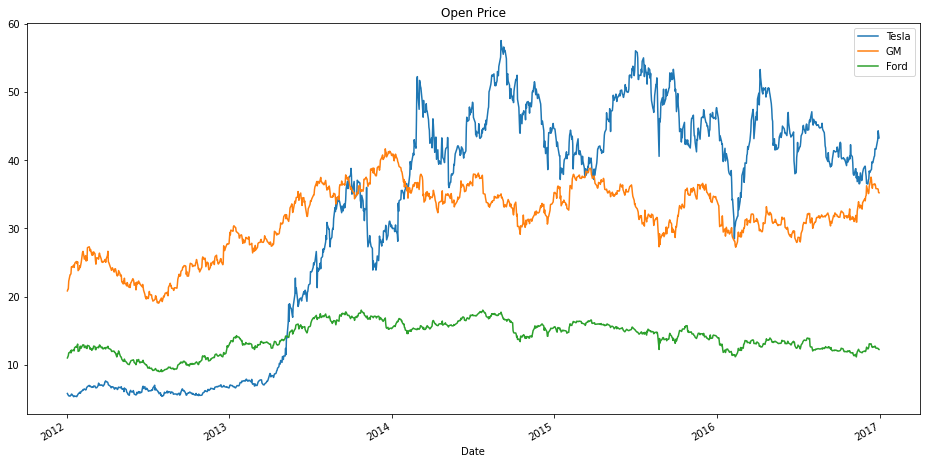

In [13]:
# For plotting several stocks, .plot() them one after the other
# Use label property and then plt.legend()
tesla['Open'].plot(label='Tesla',figsize=(16,8),title='Open Price')
gm['Open'].plot(label='GM')
ford['Open'].plot(label='Ford')
plt.legend()

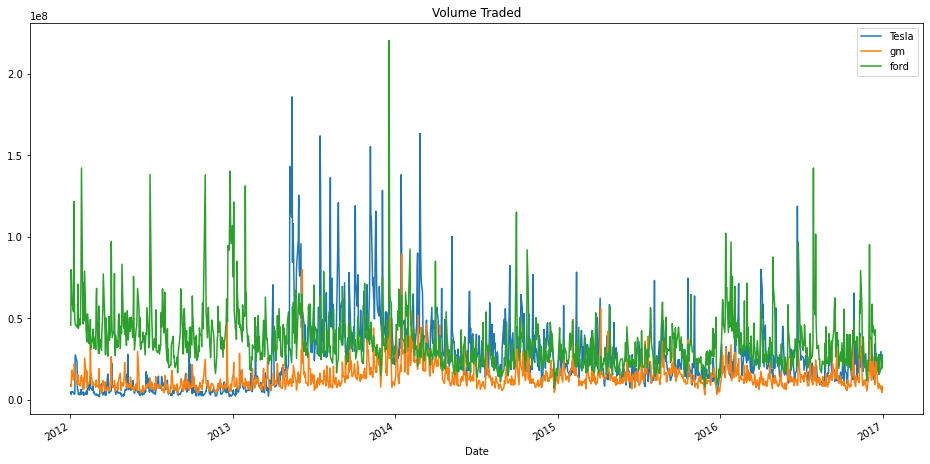

In [14]:
# The same with the Volume
tesla['Volume'].plot(label='Tesla',figsize=(16,8),title='Volume Traded')
gm['Volume'].plot(label='gm')
ford['Volume'].plot(label='ford')
plt.legend()

**Typical question: What happened on the day of max volume?**

In [16]:
tesla.index[tesla['Volume'].argmax()]

Timestamp('2013-05-14 00:00:00')

In [17]:
gm.index[gm['Volume'].argmax()]

Timestamp('2014-01-15 00:00:00')

In [18]:
ford.index[ford['Volume'].argmax()]

Timestamp('2013-12-18 00:00:00')

In [19]:
# Google company + date, eg: Ford + 2013-12-18
# We should compare also price fluctuation with volume

**Total USD volume traded**: We have to look at the total market cap in order to see the real value fluctuation of the company, not only its share price. We don't have that market cap or the number of available shares; however, we can compute the total amount of USD volume traded multiplying the stock volume with the share price. That gives us a better idea than the price alone, even though it's not really as good as the market cap.

In [20]:
tesla['Total Volume Traded'] = tesla['Volume']*tesla['Close']
ford['Total Volume Traded'] = ford['Volume']*ford['Close']
gm['Total Volume Traded'] = gm['Volume']*gm['Close']

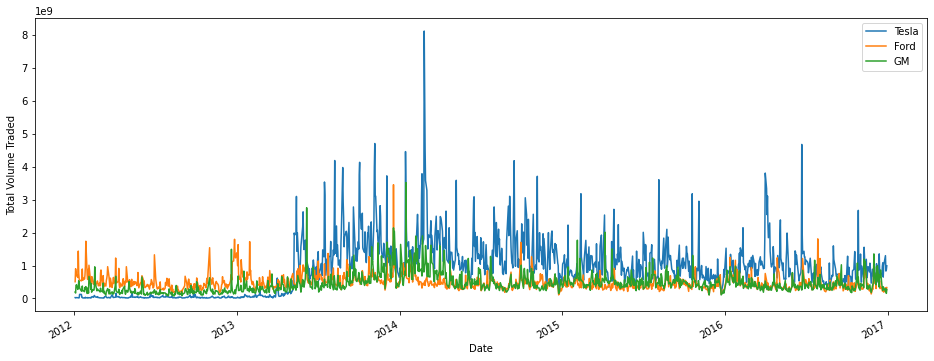

In [24]:
tesla['Total Volume Traded'].plot(label='Tesla',figsize=(16,6))
ford['Total Volume Traded'].plot(label='Ford')
gm['Total Volume Traded'].plot(label='GM')
plt.ylabel('Total Volume Traded')
plt.legend()

**What happened on the day of max total traded volume?**

In [27]:
# Get data on argmax() and google Tesla + date
tesla.index[tesla['Total Volume Traded'].argmax()]

Timestamp('2014-02-25 00:00:00')

### Moving Averages